In [89]:
%load_ext autoreload
%autoreload 2

from rdkit import Chem
from rdkit.Chem import AllChem
from mol_anal.mol_utils import smiles_to_mol,get_bond_length,get_bond_list
from mol_anal.atom_dict import atom_van_dict
from mol_anal.calc_volume import calc_mol_volume
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
smiles="[H]C1=CC=C(S)C(OC)=C1"
smiles="[*]C1=CC=C(S[*])C=C1"

unit_symbol="*"

RDKit ERROR: [18:43:17] UFFTYPER: Unrecognized atom type: *_ (0)
RDKit ERROR: [18:43:17] UFFTYPER: Unrecognized atom type: *_ (6)


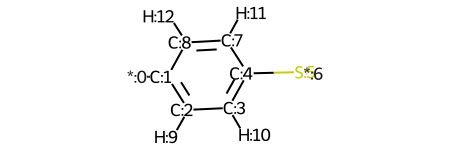

In [94]:
mol=smiles_to_mol(smiles)
mol

In [95]:
calc_mol_volume(mol)

52.30662841327054